<a href="https://colab.research.google.com/github/GSelvakumar/ml/blob/main/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Notebook imports and Packages

In [87]:
from math import log
from matplotlib import cm # color map
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D # 3D Chart

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sympy import symbols, diff #symbols allow us to write mathematical function and diff allow us to differentiate mathematical function.
%matplotlib inline

**EXAMPLE 1 => A SIMPLE COST FUNCTION**

$f(x) = x^2 + x + 1$

In [88]:
def f(x):
  return x**2 + x + 1

In [89]:
x1 = np.linspace(start=-3, stop= 3, num= 500)


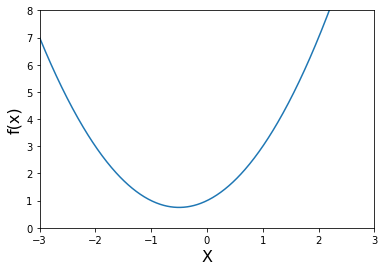

In [90]:
#Plot

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.plot(x1, f(x1))
plt.show()

Derivative of function ($f(x) = x^2 + x + 1$)  is  $df(x)$ which is $2x + 1$

In [91]:
def df(x):
  return 2*x + 1

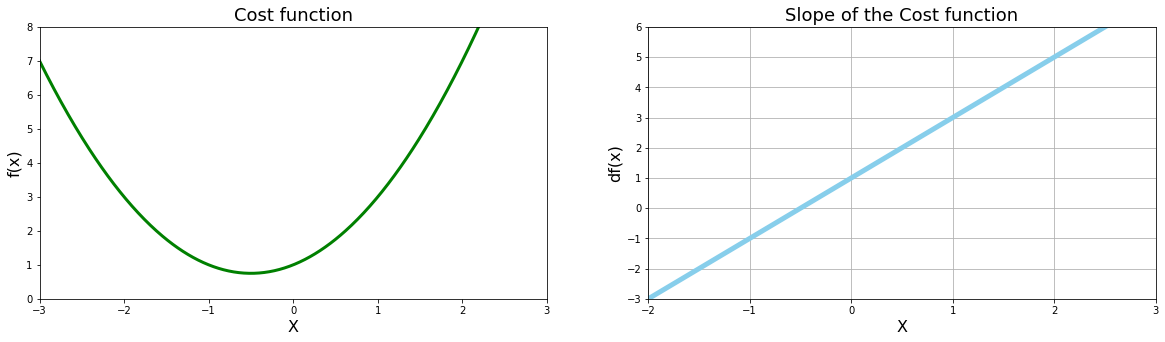

In [92]:
#Plot function and derivaties side by side

plt.figure(figsize=[20,5])

#Chart 1: Cost function => plot of f(x)
plt.subplot(1, 2, 1) #(rows, columns, index)

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title("Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.plot(x1, f(x1), color='green', linewidth=3)

#Chart 2: Derivative => plot of df(x)
plt.subplot(1, 2, 2)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.grid()
plt.title("Slope of the Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)
plt.plot(x1, df(x1), color='skyblue', linewidth=5)

plt.show()

##Gradient Descent

It is the optimization algorithm for finding the minimum of the function.

In [93]:
new_x = 3
previous_x = 0 #temporary variable
step_multiplier = 0.1 #learning rate or gamma
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
  previous_x = new_x
  gradient = df(previous_x)
  new_x = previous_x - step_multiplier * gradient # minus sign indicates that going steep down towards the gradient 

  step_size = abs(new_x - previous_x)

  x_list.append(new_x)
  slope_list.append(df(new_x))

  if step_size < precision:
    print("loop ran this many times:", n)
    break

print("Local minimum occurs at: ", new_x)
print("Slope or df(x) value at this point is: ",df(new_x))
print("f(x) value or cost at this point is: ", f(new_x))

loop ran this many times: 50
Local minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point is:  0.7500000015970362


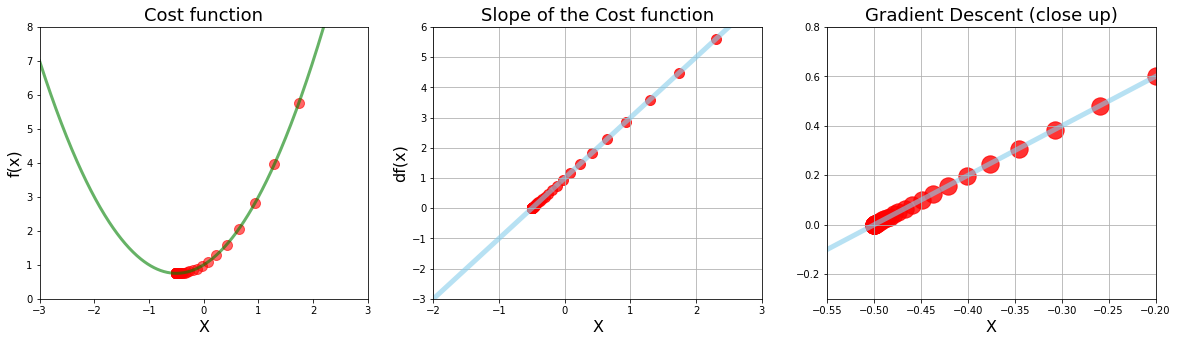

In [94]:
#The Gradient descent calculations on plot

plt.figure(figsize=[20,5])

#Chart 1: Cost function => plot of f(x)
plt.subplot(1, 3, 1) #(rows, columns, index)

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title("Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)

values = np.array(x_list)
plt.scatter(x_list, f(values), color="red", s=100, alpha=0.6)

plt.plot(x1, f(x1), color='green', linewidth=3, alpha=0.6)

#Chart 2: Derivative => plot of df(x)
plt.subplot(1, 3, 2)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.grid()
plt.title("Slope of the Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)

plt.plot(x1, df(x1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color="red", s=100,alpha=0.8)

#Chart 2: Derivative (Close up)
plt.subplot(1, 3, 3)
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)
plt.grid()
plt.title("Gradient Descent (close up)", fontsize=18)
plt.xlabel("X", fontsize=16)

plt.plot(x1, df(x1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color="red", s=300,alpha=0.8)

plt.show()

##Multiple Minima Vs Initial guess

$$ g(x) = x^4 - 4x^2 + 5$$

In [95]:
#generate data using numpy

x2 = np.linspace(-2, 2, 1000)

def g(x):
  return x**4 - 4*x**2 + 5

def dg(x):
  return 4*x**3 - 8*x

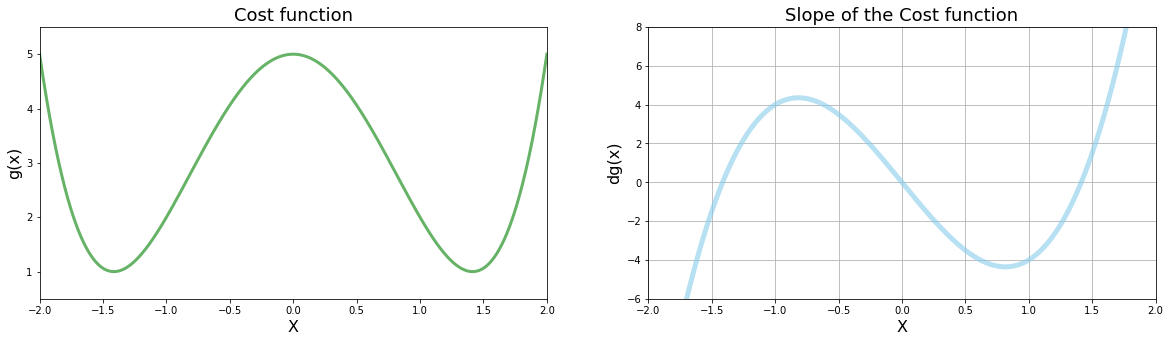

In [96]:
#The Gradient descent calculations on plot
plt.figure(figsize=[20,5])

#Chart 1: Cost function => plot of f(x)
plt.subplot(1, 2, 1) #(rows, columns, index)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title("Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

plt.plot(x2, g(x2), color='green', linewidth=3, alpha=0.6)


#Chart 2: Derivative => plot of df(x)
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()
plt.title("Slope of the Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)

plt.plot(x2, dg(x2), color='skyblue', linewidth=5, alpha=0.6)

plt.show()

##Gradient descent as a Python function

In [97]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, 
                     precision=0.001, max_iter=300):

  new_x = initial_guess

  x_list = [new_x]
  slope_list = [derivative_func(new_x)]

  for n in range(max_iter):
    previous_x = new_x
    gradient = derivative_func(previous_x)
    new_x = previous_x - multiplier * gradient # minus sign indicates that going steep down towards the gradient 

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(derivative_func(new_x))

    if step_size < precision:
      print("loop ran this many times:", n)
      break
  return new_x, x_list, slope_list


In [98]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print("Local min occurs at: ", local_min)
print("Number of steps: ", len(list_x))

loop ran this many times: 21
Local min occurs at:  1.4122375085019094
Number of steps:  23


In [99]:
local_min,list_x,deriv_list=gradient_descent(derivative_func=dg, initial_guess=-0.5, 
                                                 multiplier=0.02, precision=0.001)
print("Local min occurs at: ", local_min)
print("Number of steps: ", len(list_x))

loop ran this many times: 21
Local min occurs at:  -1.4122375085019094
Number of steps:  23


loop ran this many times: 28


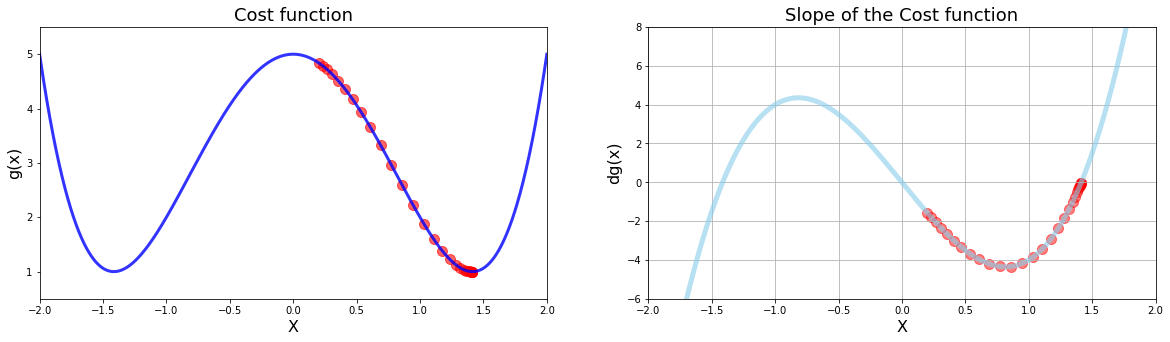

In [100]:
local_min,list_x,deriv_list=gradient_descent(derivative_func=dg, initial_guess= 0.2, 
                                                 multiplier=0.02, precision=0.001)

plt.figure(figsize=[20,5])

#Chart 1: Cost function => plot of f(x)
plt.subplot(1, 2, 1) #(rows, columns, index)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title("Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

plt.plot(x2, g(x2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

#Chart 2: Derivative => plot of df(x)
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()
plt.title("Slope of the Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)

plt.plot(x2, dg(x2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

##Divergence, Overflow and Python tuples

$$h(x) = x^5 - 2x^4 + 2$$

In [101]:
x3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
  return x**5 - 2*x**4 + 2

def dh(x):
  return 5*x**4 - 8*x**3

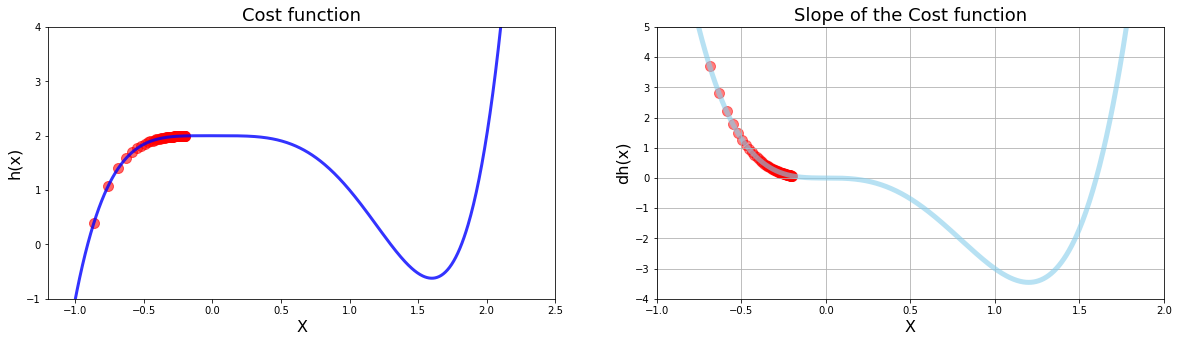

local min occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  72


In [102]:
local_min,list_x,deriv_list=gradient_descent(derivative_func=dh,initial_guess= -0.2, 
                                                 max_iter=71)

plt.figure(figsize=[20,5])

#Chart 1: Cost function => plot of h(x)
plt.subplot(1, 2, 1) #(rows, columns, index)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)
plt.title("Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("h(x)", fontsize=16)

plt.plot(x3, h(x3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

#Chart 2: Derivative => plot of dh(x)
plt.subplot(1, 2, 2)
plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.grid()
plt.title("Slope of the Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("dh(x)", fontsize=16)

plt.plot(x3, dh(x3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print("local min occurs at: ", local_min)
print("Cost at this minimum is: ", h(local_min))
print("Number of steps: ", len(list_x))

In [103]:
import sys
type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

In [104]:
#Sequence Unpacking

breakfast = ('Poori', 'Bacon', 'Brocolli')
main, side, greens = breakfast
print("Main course is ", main)

Main course is  Poori


In [105]:
data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

loop ran this many times: 115
Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps is 117


##Learning Rate


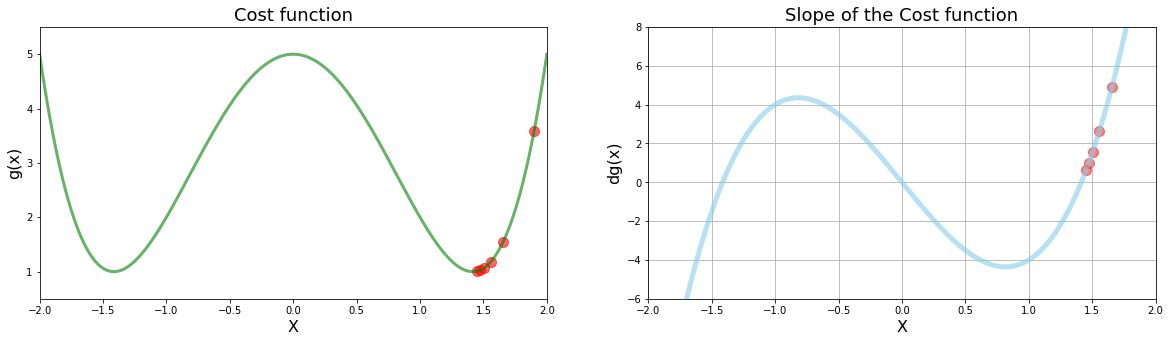

No of steps is :  6


In [106]:
#The Gradient descent calculations on plot
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=1.9,
                                                 multiplier=0.02, max_iter=5)

plt.figure(figsize=[20,5])

#Chart 1: Cost function => plot of f(x)
plt.subplot(1, 2, 1) #(rows, columns, index)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title("Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

plt.plot(x2, g(x2), color='green', linewidth=3, alpha=0.6)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

#Chart 2: Derivative => plot of df(x)
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()
plt.title("Slope of the Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)

plt.plot(x2, dg(x2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)
plt.show()

print('No of steps is : ',len(list_x))

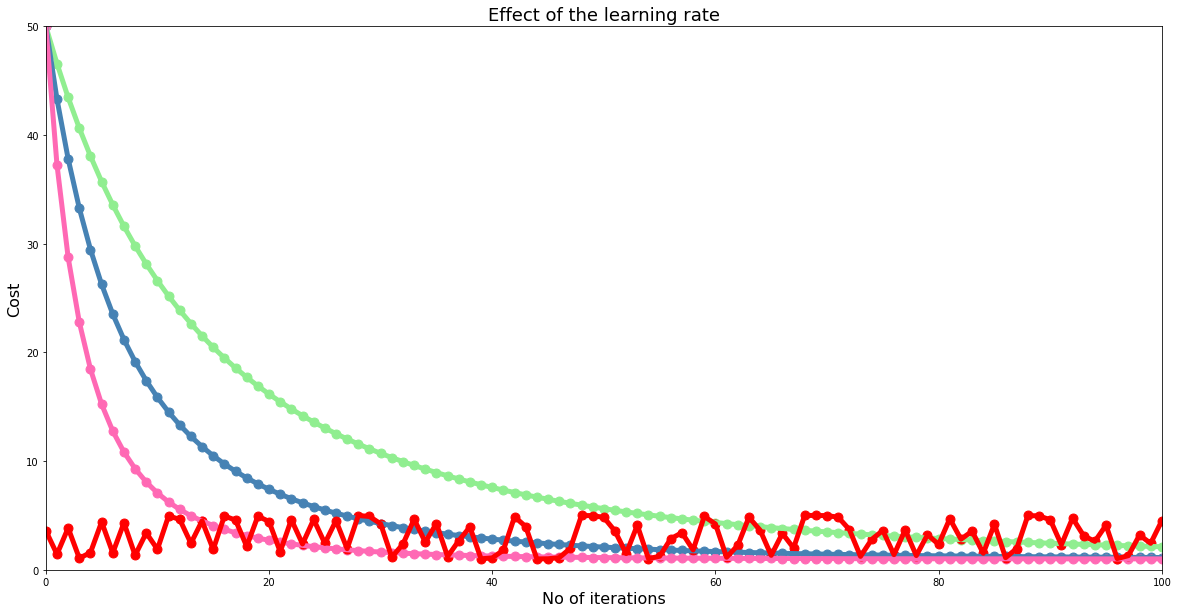

In [107]:
#Run gradient descent 3 times
n=100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,multiplier=0.0005,
                             precision=0.0001,max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,multiplier=0.001,
                             precision=0.0001,max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,multiplier=0.002,
                             precision=0.0001,max_iter=n)

#experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9,multiplier=0.25,
                             precision=0.0001,max_iter=n)

#plotting reduction in cost for each iteratio
plt.figure(figsize=[20,10])

plt.xlim(0, n)
plt.ylim(0, 50)
plt.title("Effect of the learning rate", fontsize=18)
plt.xlabel("No of iterations", fontsize=16)
plt.ylabel("Cost", fontsize=16)

#Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

#plotting the low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

#plotting the mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

#plotting the high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

#plotting the high learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)

plt.show()

## Data Visualisation with 3-D charts

## Minimise $$f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1} $$

Minimise $$f(x, y) = \frac{1}{r + 1} $$

where $r$ is $3^{-x^2 - y^2}$

In [108]:
def f(x, y):
  r = 3**(-x**2 - y**2)
  return 1 / (r + 1)

In [109]:
# Make x and y data

x4 = np.linspace(start=-2, stop=2, num=200)
y4 = np.linspace(start=-2, stop=2, num=200)

print(type(x4))
print("Shape of X array",x4.shape) #single dimension and it is a vector

x4, y4 = np.meshgrid(x4, y4) #creates a 2D data from 1D data
print("Array after meshgrid: ", x4.shape)

<class 'numpy.ndarray'>
Shape of X array (200,)
Array after meshgrid:  (200, 200)


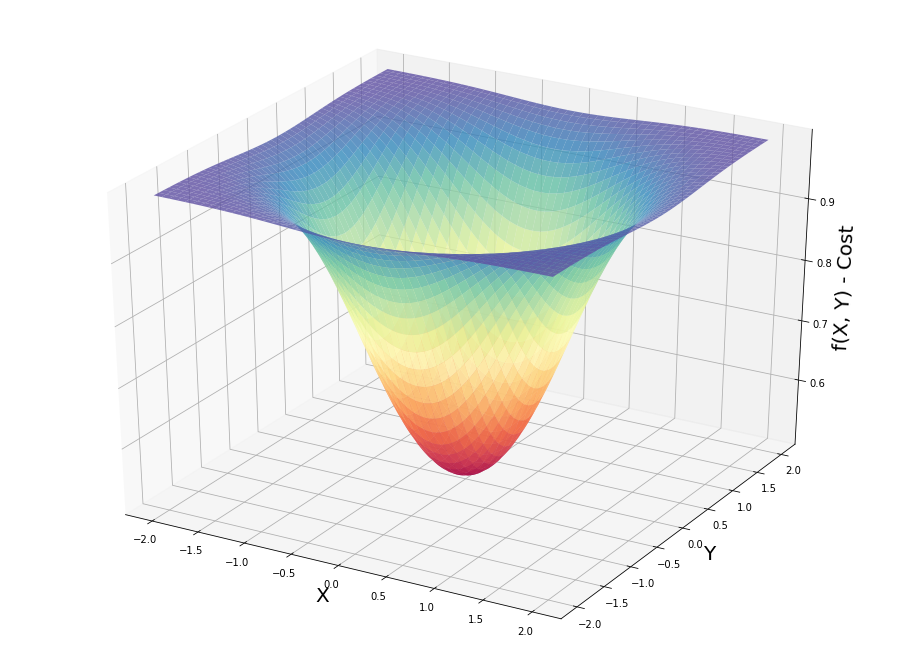

In [110]:
 #Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(X, Y) - Cost', fontsize=20)

ax.plot_surface(x4, y4, f(x4, y4), cmap=cm.Spectral, alpha=0.8) #f(x4, y4) is the z axes data
plt.show()

## Partial Derivatives and Symbolic Computation

## $$ \frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 -y^2}} {(3^{-x^2 -y^2}+1)^2} $$

## $$ \frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 -y^2}} {(3^{-x^2 -y^2}+1)^2} $$


In [111]:
a, b = symbols('x, y') #symbol allows us to define the x and y as a and b.
print("Our Cost function f(x, y) is: ",f(a, b))
print('Partial derivatives w.r.t x is: ',diff(f(a, b), a)) 
#differentiate with respect to a.

print('Values of f(x,y) at x=1.8 , y=1.0 is: ',f(a, b).evalf(subs={a:1.8, b:1.0}))
#inside the evalf substitute the values at which point we want to evaluate the cost.

print('Value of partial derivative wrt x: ',diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))
#slope at this particular point in the x direction

Our Cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivatives w.r.t x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Values of f(x,y) at x=1.8 , y=1.0 is:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [112]:
#Setup

multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
  gradient_x=diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
  gradient_y=diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
  gradients = np.array([gradient_x, gradient_y])
  params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x values of : ', params[0])
print('Minimum occurs at x values of : ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [0.000461440542096373 0.000256355856720208]
Minimum occurs at x values of :  0.000793898510134722
Minimum occurs at x values of :  0.000441054727852623
The cost is:  0.500000226534985


In [113]:
# Partial derivative functions examples

def fpx(x, y):
  r = 3**(-x**2 -y**2)
  return 2*x*log(3)*r / (r+1)**2

def fpy(x, y):
  r = 3**(-x**2 -y**2)
  return 2*y*log(3)*r / (r+1)**2

In [114]:
#Setup

multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
  gradient_x=fpx(params[0], params[1])
  gradient_y=fpy(params[0], params[1])
  gradients = np.array([gradient_x, gradient_y])
  params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x values of : ', params[0])
print('Minimum occurs at x values of : ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x values of :  0.0007938985101347202
Minimum occurs at x values of :  0.0004410547278526219
The cost is:  0.5000002265349848


## Mapping 3D gradient descents & advanced Numpy arrays



In [115]:
#Setup

multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) #initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
  gradient_x=fpx(params[0], params[1])
  gradient_y=fpy(params[0], params[1])
  gradients = np.array([gradient_x, gradient_y])
  params = params - multiplier * gradients
  values_array = np.append(values_array, params.reshape(1, 2), axis=0)

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x values of : ', params[0])
print('Minimum occurs at x values of : ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x values of :  0.0007938985101347202
Minimum occurs at x values of :  0.0004410547278526219
The cost is:  0.5000002265349848


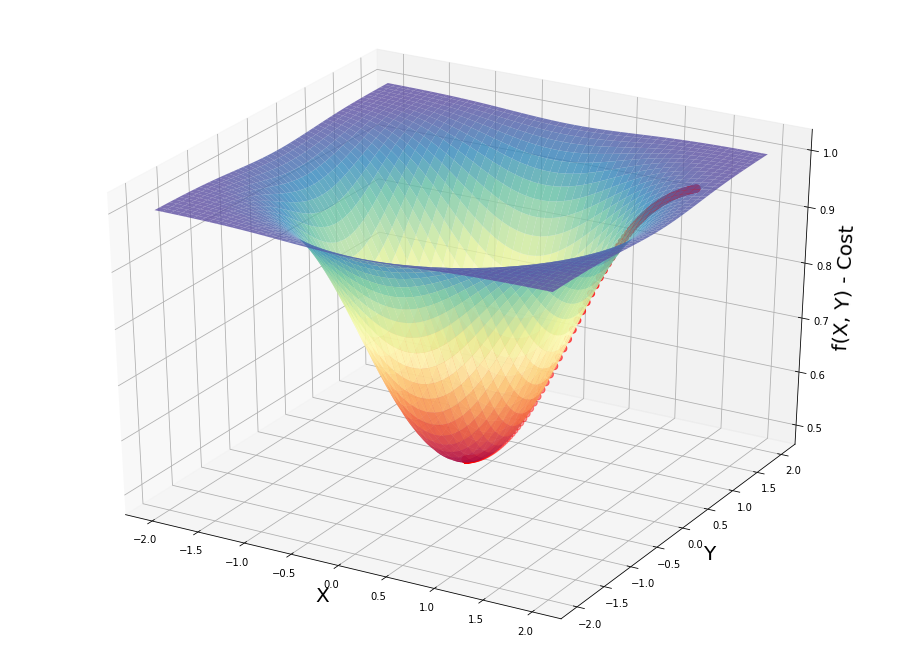

In [116]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(X, Y) - Cost', fontsize=20)

ax.plot_surface(x4, y4, f(x4, y4), cmap=cm.Spectral, alpha=0.8) #f(x4, y4) is the z axes data
ax.scatter(values_array[:,0], values_array[:, 1], f(values_array[:, 0],  values_array[:, 1]), s=50, color='red')

plt.show()

In [117]:
# Advanced Numpy Array practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'],['QuestLove', 'Drums']])
print(hs_band.shape)

print('hs_band[0] : ', hs_band[0])
print('hs_band[0][0] : ', hs_band[0][0])

combine = np.append(arr=hs_band, values=kirk, axis=0)
print(combine)

(1, 2)
(2, 2)
hs_band[0] :  ['Black Thought' 'MC']
hs_band[0][0] :  Black Thought
[['Black Thought' 'MC']
 ['QuestLove' 'Drums']
 ['Captain' 'Guitar']]


## Working with Data & a Real cost function

## Mean Squared Error: a Cost function for regression problems

### $$ RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [118]:
# Make sample data

x5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x5 array: ', x5.shape)
print('Shape of y5 array: ', y5.shape)

Shape of x5 array:  (7, 1)
Shape of y5 array:  (7, 1)


In [119]:
# Quick Linear Regression

regr = LinearRegression()
regr.fit(x5, y5)

print('Theta 0 : ', regr.intercept_[0])
print('Theta 1 : ', regr.coef_[0][0])

Theta 0 :  0.8475351486029545
Theta 1 :  1.2227264637835913


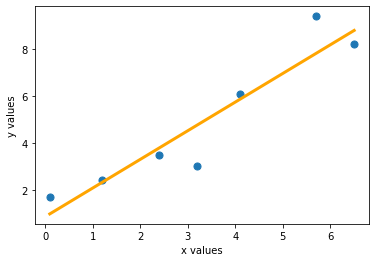

In [120]:
# linear plot

plt.scatter(x5, y5, s=50)
plt.plot(x5, regr.predict(x5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [121]:
# y_hat = theta0 + theta1 * x 

y_hat = 0.8475351486029545 + 1.2227264637835913 * x5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [122]:
# MSE function for the y_hat

def mse(y, y_hat):
  #mse_calc = 1/7 * sum((y - y_hat)**2) # formula 1 : hardcoded
  #mse_calc = (1/y.size) * sum((y - y_hat)**2) # formula 2 : using size
  mse_calc = np.average((y - y_hat)**2, axis=0) 
  return mse_calc

In [123]:
print('Manually calculated MSE is: ',mse(y5, y_hat))

Manually calculated MSE is:  [0.94796558]


In [124]:
print('MSE regression using manual calc is ', mean_squared_error(y5, y_hat))
print('MSE regression is ', mean_squared_error(y5, regr.predict(x5)))

MSE regression using manual calc is  0.9479655759794577
MSE regression is  0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [125]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

## Calc MSE using nested for loops

In [126]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
  for j in range(nr_thetas):
    y_hat = plot_t0[i][j] + plot_t1[i][j]*x5
    plot_cost[i][j] = mse(y5, y_hat)

print('Shape of plot_t0 is ', plot_t0.shape)
print('Shape of plot_t1 is ', plot_t1.shape)
print('Shape of plot_cost is ', plot_cost.shape)

Shape of plot_t0 is  (200, 200)
Shape of plot_t1 is  (200, 200)
Shape of plot_cost is  (200, 200)


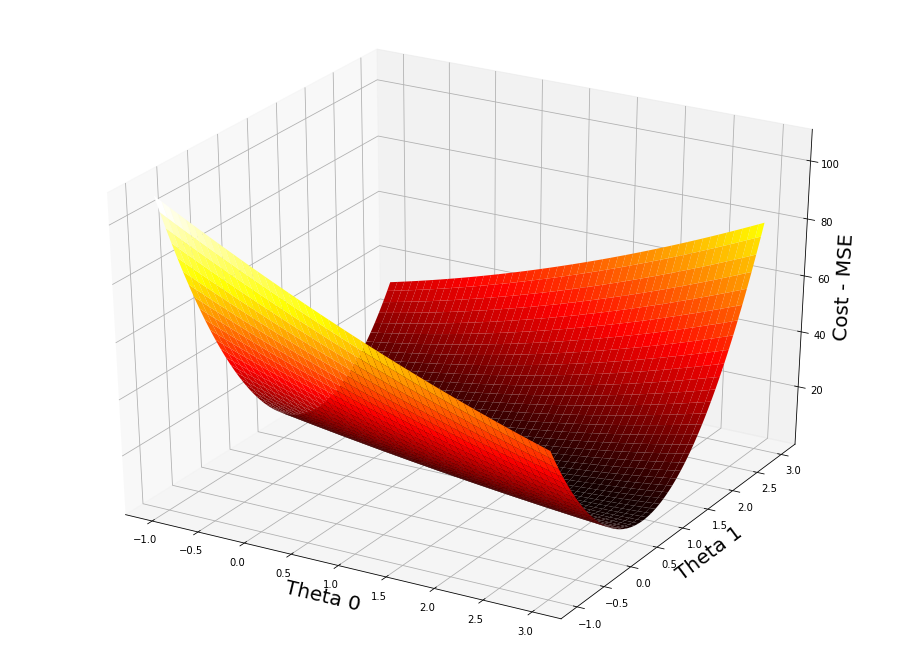

In [127]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1',  fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [128]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print('Min occurs at (i, j): ',ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91] :', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91] :', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i, j):  (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] : 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] : 1.2311557788944723


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  


## Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$

## $$ \frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) $$

## $$ \frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent



In [133]:
# x values, y values, array of theta parameters (theta 0 at index 0 and theta1 at index 1)

def grad(x, y, thetas):
  n = y.size

  theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
  theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

  #return np.array([theta0_slope[0], theta1_slope[0]])
  #return np.append(arr=theta0_slope, values=theta1_slope)
  return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [135]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

#Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y5, thetas[0] + thetas[1]*x5)

for i in range(1000):
  thetas = thetas - multiplier * grad(x5, y5, thetas)

  #Append the new values to our numpy arrays
  plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
  mse_vals = np.append(arr=mse_vals, values=mse(y5, thetas[0] + thetas[1]*x5))


# Results
print('Min occurs at Theta 0: ', thetas[0])
print('Min occurs at Theta 1: ', thetas[1])
print('MSE is: ', mse(y5, thetas[0] + thetas[1]*x5))

Min occurs at Theta 0:  0.8532230461743415
Min occurs at Theta 1:  1.2214935332607393
MSE is:  [0.94797511]


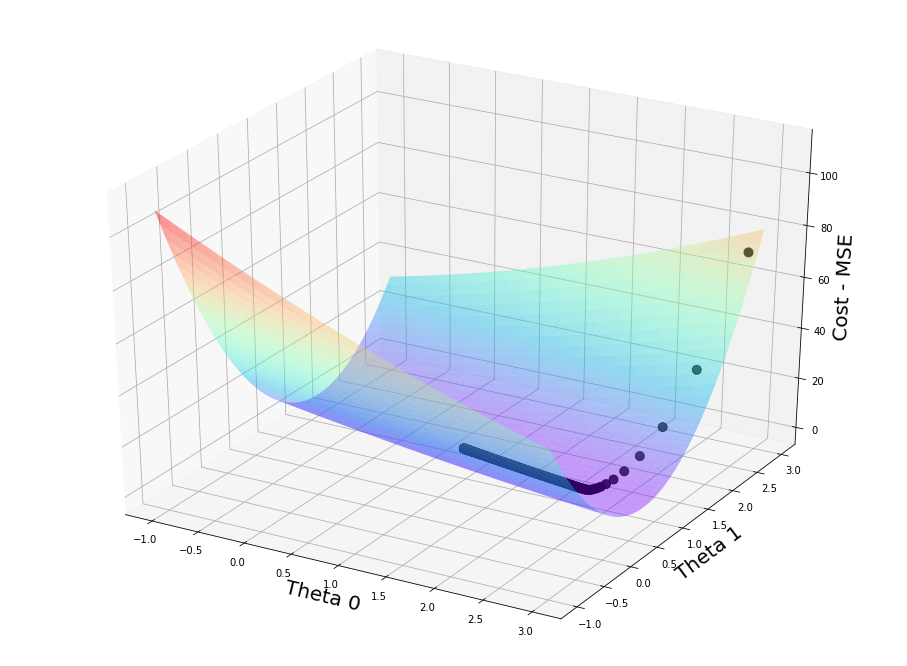

In [137]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1',  fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()